# Машинное обучение, ВМК МГУ

# Практическое задание 4. Optimal Control Reinforcement Learning

## Общая информация
Дата выдачи: 30.04.2024

Мягкий дедлайн: 15.05.2024 5:30 MSK

Жёсткий дедлайн: 22.05.2024 5:30 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-04-ocrl-Username.ipynb


Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

## Задание 1 (4 балла): уравнения Рикатти для управления дроном.

Начнем с небольшой разминки: реализация классического алгоритма нахождения оптимального управления для двухмерного дрона. Его динамика уже реализована за вас в файле qudrotor.py. Кроме того, реализована также визуализация его управления.

В качестве описания текущего состояния предлагается использовать вектор из 6-ти элементов [x, dx, y, dy, theta, dtheta]:

*   x - координата центра дрона по x
*   dx - скорость центра дрона по x
*   y - координата центра дрона по y
*   dy - скорость центра дрона по y
*   theta - угол наклона относительно оси x
*   dtheta - угловая скорость

В качестве управления используем вектор из 2 элементов [u1, u2]:

*   u1 - сила тяги левого винта
*   u2 - сила тяги правого винта

Сила измеряется в ньютонах, прикладывается перпендикулярно линии, проведенной между двумя винтами.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import quadrotor
import math
import sympy

Зададим параметы для дальнейшей работы:

In [3]:
m = 0.6 #масса дрона
r = 0.2 #длина дрона от левого до правого винта
I = 0.15 #инерция
g = 9.81 #ускорение свободного падения
dt = 0.01 #временной шаг

**Задание 1 (0.2 балла):** для начала проверим что все хорошо работает нормально. Реализуйте две функции-контроллера и проверьте их работу. Функции должны принимать на вход текущее состояние и номер таймстепа. Выдавать функции должны управление.

Первая функция должна давать команду ничего не делать (то есть всегда выдавать нулевое управление)

Вторая должна заставлять дрон висеть в воздухе при условии что он появляется в правильном положении параллельно оси x.

In [4]:
def do_nothing_controller(state, i):
    u = np.zeros((2, ))
    return u

def stabilize_controller(state, i):
    force = m * g / 2
    u = np.full((2, ), force)
    return u

Проверим реализации. В первом случае дрон должен падать вниз, во втором - висеть в точке (0, 0).

In [4]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, do_nothing_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

Once 
 
 Loop 
 
 Reflect

In [30]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, stabilize_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

Once 
 
 Loop 
 
 Reflect

**Задание 2 (1.5 баллов):** Как вы помните, уравнения Рикатти как и базовый алгоритм ПМП удобнее всего реализовывать для задачи типа LQR. Однако, она имеет 2 требования, которые не выполняются в нашей задаче.

Требование 1: динамика должна выглядеть следующим образом:
$x_{k+1} = Ax_k + Bu_k$.

Требование 2: функция потерь должна выглядеть следующим образом:
$cost(x,u) = x^TQx + uRu$


Для нашей задачи выписать подобные матрицы в общем случае невозможно. Попробуем нашу динамику аппроксимировать линейной в каждой точке.

Требование 2 не выполняется, так как нам в теории хочется чтобы дрон оказался в конкретной точке. То есть, хочется минимизировать такой лосс: $cost(x,u) = (x-x^*)^TQ(x-x^*) + (u-u^*)^TR(u-u^*)$. Самый простой выход в нашем случае - решать задачу в терминах расстояний до конечной точки (то есть, новый вектор наблюдений - $\overline{x} = (x-x^*), \overline{u}=(u-u^*)$

1. Выпишите аппроксимацию функции (пока без А и В, просто через приращения) $f(x,u)$, где $x_{n+1} = f(x_n, u_n)$. Keywords: второй закон Ньютона, линейное и угловое ускорение стержня, здравый смысл

2. С помощью разложения в ряд Тейлора в окрестности $x^*, u^*$ выведите функцию $\overline{f}: \overline{x}_{n+1} = \overline{f}(\overline{x}_{n}, \overline{u}_{n}) = A\overline{x}_{n} + B\overline{u}_{n}$

3. Запрограммируйте подсчет этих матриц

Выведем законы динамики, которым подчиняется система. Для этого приведем схематическое изображение сил, действующих на дрон:

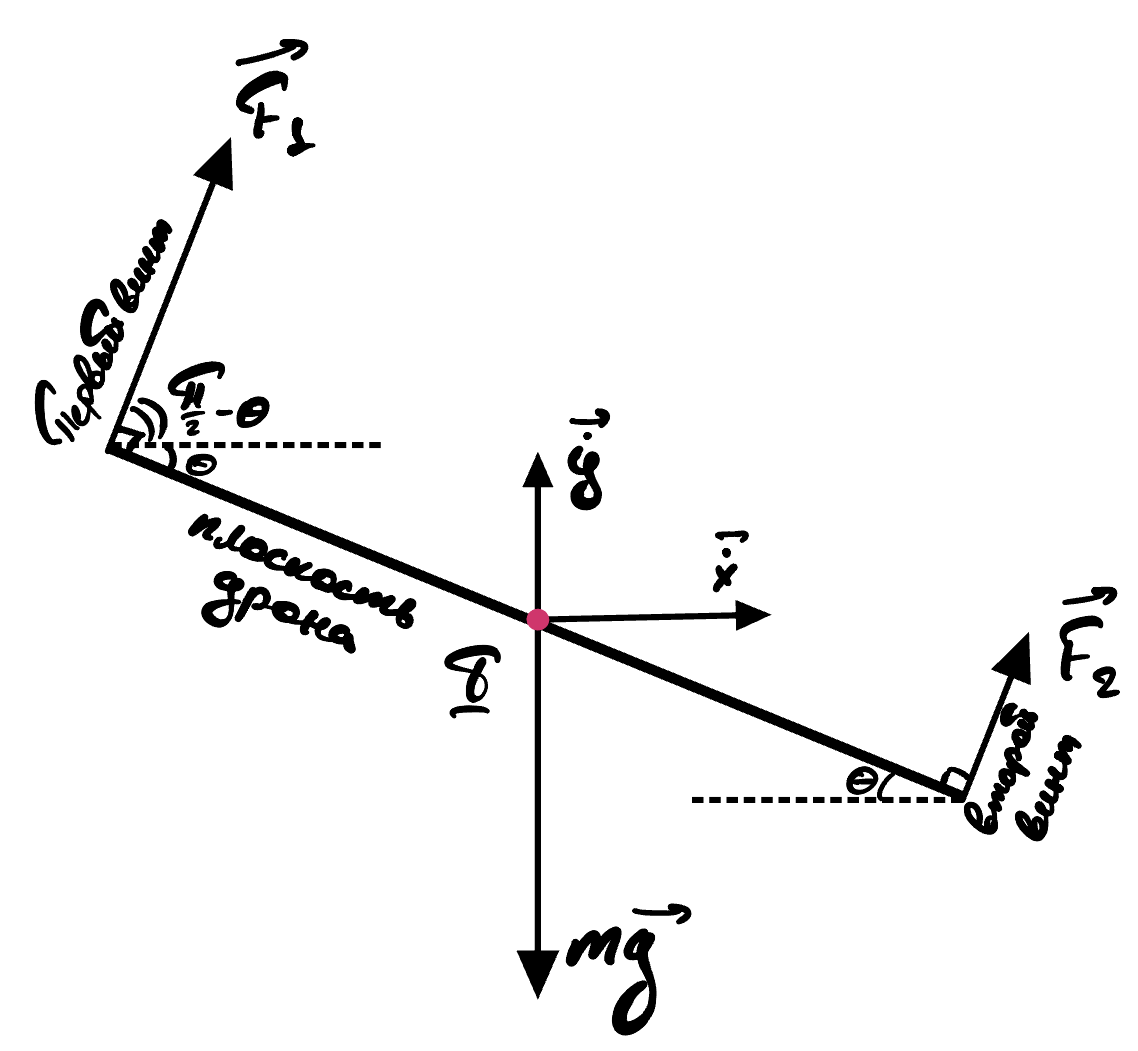

***Замечу, что угл тета здесь выбран противоположный тому, что реализован. Так что это проблема картинки и формул для $f$. Реализация учитывает правильный угл.***

Тогда получим системы для известных векторов $x_n = \left \{x_n, \frac{d x_n}{d t}, y_n, \frac{d y_n}{d t}, \theta_n, \frac{d \theta_n}{d t} \right \}$ и $u_n = \left \{F_1, F_2 \right \}$:

$$
\left(f \right)
\begin{equation*}
    \left\{
        \begin{aligned}
            & Oy: a_y m = \frac{d^2 y}{d t^2} m = F_1 \cos(\theta) + F_2 \cos(\theta) - gm \\
            & Ox: a_x m = \frac{d^2 x}{d t^2} m = F_1 \sin(\theta) + F_2 \sin(\theta) \\
            & L = I\omega, \,\, M = \frac{d L}{d t} \Longrightarrow \frac{d \omega}{d t} = \frac{d^2 \theta}{d t^2} = \frac{M}{I} \\
            & M = \frac{F_1 - F_2}{r/2}
        \end{aligned}
    \right.
\end{equation*}

\Longrightarrow

\begin{equation*}
    \left\{
        \begin{aligned}
            & x_{n+1} = x_n + \frac{d x_n}{d t} \Delta t + \frac{1}{2} \frac{d^2 x}{d t ^2} \Delta t ^ 2 \\
            & y_{n+1} = y_n + \frac{d y_n}{d t} \Delta t + \frac{1}{2} \frac{d^2 y}{d t ^2} \Delta t ^ 2 \\
            & \theta_{n+1} = \theta_n + \frac{d \theta_n}{d t} \Delta t + \frac{1}{2} \frac{d^2 \theta}{d t ^2} \Delta t ^ 2 \\
            & \frac{d x_{n+1}}{d t} = \frac{d x_n}{d t} + \frac{d^2 x}{d t ^2} \Delta t \\
            & \frac{d y_{n+1}}{d t} = \frac{d y_n}{d t} + \frac{d^2 y}{d t ^2} \Delta t \\
            & \frac{d \theta_{n+1}}{d t} = \frac{d \theta_n}{d t} + \frac{d^2 \theta}{d t ^2} \Delta t \\
        \end{aligned}
    \right.
\end{equation*}

\Longrightarrow

\begin{equation*}
    \left\{
        \begin{aligned}
            & x_{n+1} = x_n + \frac{d x_n}{d t} \Delta t + \frac{1}{2m} \left( F_1 \sin(\theta) + F_2 \sin(\theta) \right ) \Delta t ^ 2 \\
            & y_{n+1} = y_n + \frac{d y_n}{d t} \Delta t + \frac{1}{2m} \left(F_1 \cos(\theta) + F_2 \cos(\theta) - gm \right ) \Delta t ^ 2 \\
            & \theta_{n+1} = \theta_n + \frac{d \theta_n}{d t} \Delta t + \frac{F_1 - F_2}{Ir} \Delta t ^ 2 \\
            & \frac{d x_{n+1}}{d t} = \frac{d x_n}{d t} + \frac{F_1 \sin(\theta) + F_2 \sin(\theta)}{m} \Delta t \\
            & \frac{d y_{n+1}}{d t} = \frac{d y_n}{d t} + \frac{F_1 \cos(\theta) + F_2 \cos(\theta) - gm}{m} \Delta t \\
            & \frac{d \theta_{n+1}}{d t} = \frac{d \theta_n}{d t} + 2\frac{F_1 - F_2}{Ir} \Delta t \\
        \end{aligned}
    \right.
\end{equation*}
$$

Такая система описывает динамику системы в абсолютных координатах. Для нас такое не подходит. Будем считать, что для нас известно конечное состояние: зависание коптера в определенной точке. А значит мы можем записать решение в координатах: $\overline{x}=x-x^*$, $\overline{u}=u-u^*$. Для этого перейдем к системе $\overline{x}_{n+1}=\overline{f}(\overline{x}_n, \overline{u}_n)$, что является производной от изначальной динамики $f$ и описывается посредством оператора $A$ $\Rightarrow$ $\overline{f}\left(\overline{x},\overline{u} \right) = A[f, x^*, u^*]\left(x,u \right)$

$$
    \overline{f}(\overline{x}, \overline{u}) = \overline{f}(x - x^*, u - u^*) = \overline{f}\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) + \left(\nabla_x \overline{f}\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) \right )^* \overline{x} +  \left(\nabla_u \overline{f}\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) \right )^* \overline{u} = A[f, x^*, u^*]\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) + \left(\nabla_x A[f, x^*, u^*]\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) \right )^* \overline{x} +  \left(\nabla_u A[f, x^*, u^*]\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) \right )^* \overline{u}
$$

В конечной точке искомый пребразование $\overline{f}\left(\vec{\scriptstyle 0},\vec{\scriptstyle 0} \right) = \vec{\scriptstyle 0}$ является тождественным относительно $x$. В прошлых выкладках мы перенесли точку отсчета для координат из $\{\vec{\scriptstyle 0}, \vec{\scriptstyle 0}\}$ в $\{x^*, u^*\}$. В операторной записи видно, что мы перешли к изначальной динамике в термах $\overline{x}$ и $\overline{u}$. Тогда линеризуем через матрицы $A_n$ и $B_n$ систему $f$:

$$
A_n = 
\begin{bmatrix}
1 & \Delta t & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & - g \cos(\theta) \Delta t & 0 \\
0 & 0 & 1 & \Delta t & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}

\,\,\,

B_n = 
\begin{bmatrix}
0 \, & 0 \\
- \sin(\theta) \frac{\Delta t}{m} & - \sin(\theta) \frac{\Delta t}{m} \\
0  & 0 \\
\cos(\theta) \frac{\Delta t}{m} & \cos(\theta) \frac{\Delta t}{m} \\
0 & 0 \\
\frac{\Delta t}{r I} & -\frac{\Delta t}{r I}
\end{bmatrix}

\Longrightarrow

\overline{x}_{n+1} = A_n \overline{x}_{n} + B_n \overline{u}_{n}
$$

**Задание 2. (0.3 балла)**: теперь перейдем к оптимизируемому функционалу. На семинаре рассматривался функционал как сумма функций потерь для каждой точки.

Не забываем что для удобства вычислений задача решается для относительных состояний и управлений


Ограничим рассматриваемый горизонт 1000 шагами и сгенерируем целевые состояния для каждого момента времени

In [5]:
from copy import copy

In [6]:
xstar=[]
for i in range (0,1000):
    if i >=0 and i <= 450:
        goal=np.array([[3],[0],[3],[0],[0],[0]]) # хотим чтобы за первые 450 шагов он оказался в точке (3,3)
        xstar.append(copy(goal))
    if i>=451 and i <= 550:
        goal=np.array([[3],[0],[3],[0],[np.pi/2],[0]]) # теперь говорим ему встасть перпендикулярно оси х чтобы дестабилизировать свое положение
        xstar.append(copy(goal))
    if i>=551 and i <= 1000:
        goal=np.array([[0],[0],[0],[0],[0],[0]]) # говорим ему вернуться на исходную позицию
        xstar.append(copy(goal))
xstar = np.array(xstar).reshape(1000,6,).T
xstar.shape

(6, 1000)

По умолчанию мы хотим чтобы дрон висел стабильно в воздухе, поэтому $u^*$ - это управление-стабилизатор.

Реализуйте функцию подсчета потерь по формулам с семинара. $Q$ возьмите равной $I*10000, R = I*0.0001$

In [7]:
def cost_function(x,u):
    cost = x.T @ np.eye(x.shape[0]) * 10_000 @ x + u.T @ np.eye(u.shape[0]) @ u
    return cost

**Задание 3. (2 балла):** реализуйте полный прогон уравнений Рикатти для 1000 шагов. Вам понадобится получасть матрицы A и B на каждом шаге для вычисления управления. Функция должна возвращать список из матриц K и P.

***Идея обернуть в один класс позаимствована у студента: Богачева Владимира***

Боже, так хотя бы приятно с этим работать.

In [26]:
class RiccatiHandler:
    def _init_prop_dict(self, *, m=0.6, r=0.2, I=0.15, g=9.81, dt=0.01,
                        Q=np.eye(6)*10000, R=np.eye(2)*0.0001,  **kwargs):
        self.m  = m        # масса
        self.r  = r        # длина
        self.I  = I        # инерция
        self.g  = g        # ускорение свободного падения
        self.dt = dt       # временной промежуток

        self.Q  = Q        # X cost function
        self.R  = R        # U cost function

    def __init__(self, xstar, u_stab, **kwargs):
        """
        :param xstar: desired points in X space we steer objecct at each time - [X_dim, N]
        :param u_stab: stabializer for object at each given time - [U_dim]
        """
        self.xstar = xstar
        self.u_stab = u_stab

        self.N = self.xstar.shape[1]
        self._init_prop_dict(**kwargs)

    def cost_function(self, state, u):
        cost = state.T @ self.Q @ state + u.T @ self.R @ u
        return cost

    def _get_linearization(self, state, _):
        A = np.array([
            [1, self.dt, 0,       0,                                  0,       0],
            [0,       1, 0,       0, -np.cos(state[5]) * self.g*self.dt,       0],
            [0,       0, 1, self.dt,                                  0,       0],
            [0,       0, 0,       1,                                  0,       0],
            [0,       0, 0,       0,                                  1, self.dt],
            [0,       0, 0,       0,                                  0,       1]
        ])

        B = np.array([
            [                                   0,                                    0],
            [-np.sin(state[5]) * self.dt / self.m, -np.sin(state[5]) * self.dt / self.m],
            [                                   0,                                    0],
            [ np.cos(state[5]) * self.dt / self.m,  np.cos(state[5]) * self.dt / self.m],
            [                                   0,                                    0],
            [         self.dt / (self.I * self.r),         -self.dt / (self.I * self.r)]
        ])

        return A, B

    def _riccati_step(self, statestar, u):
        N = self.N
        Q = self.Q
        R = self.R

        # get linerization in area of desired point in X
        A, B = self._get_linearization(statestar, u)
        K = np.zeros((N + 1, 2, 6))
        P = np.zeros((N + 1, 6, 6))
        P[N, :, :] = Q

        # get optimal trajectory operators for given start and desired end
        for n in reversed(range(0, N)):
            K[n, ...] = np.linalg.inv(R + B.T @ P[n + 1] @ B) @ (B.T @ P[n + 1] @ A)
            P[n, ...] = Q + A.T @ P[n + 1] @ (A - B @ K[n])
        
        return K, P

    def get_opt_control(self, state, timestamp):
        """
        :param state: state in x from which to start trajectory - [X_dim]
        :param timestamp: descrete time point when this action is been made - int
        :return optimal_u: optimal control from this point
        """
        # get operators
        K, P = self._riccati_step(self.xstar[..., timestamp], self.u_stab)

        x_overline = state - self.xstar[..., timestamp]
        return -K[0] @ x_overline + self.u_stab
    
    def __call__(self, init_state):
        """
        :param init_state: point from which controling is started
        :return tuple[opt_x, opt_u]:
            opt_x: optimal trajectory
            opt_u: optimal control
        """
        opt_x = []
        opt_u = []

        opt_x.append(init_state.copy())
        for i in range(0, self.N):
            A, B = self._get_linearization(self.xstar[..., i], self.u_stab)
            opt_u.append(self.get_opt_control(opt_x[-1], i))
            opt_x.append(A @ opt_x[-1] + B @ opt_u[-1])
        
        return opt_x, opt_u

Реализуйте генерацию управления с помощью полученного массива матриц K. Помните что мы решаем задачу в терминах относительного состояния и аппроксимированных матриц A и B. Поэтому, к вычисленному по формулам с семинара управлению требуется прибавить стабилизатор.

In [27]:
handler = RiccatiHandler(xstar, stabilize_controller(None, None))
opt_x, opt_u = handler(np.array([2, 0, -3, 0, 0.6, 0]))

opt_x=np.stack(opt_x).T
opt_u=np.stack(opt_u).T

Проверьте управление. Для получения полного балла необходимо чтобы дрон прилетал  в точку (3, 3), и возвращался в (0, 0). ВЕКТОР ЦЕЛЕВЫХ СОСТОЯНИЙ xstar МЕНЯТЬ ЗАПРЕЩЕНО

In [28]:
quadrotor.animate_robot(opt_x, opt_u + stabilize_controller(None, None)[:, None])

Once 
 
 Loop 
 
 Reflect

## Задание 2 (6 баллов): уравнение Беллмана

Теперь рассмотрим 1 из популярных в наши дни методов обучения с подкреплением: A2C. Для реализиции будем использовать популярную в наше время библиотеку RL-щиков [gymnasium](https://gymnasium.farama.org/content/basic_usage/).

Произведем настройку окружения

In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

bash: ../xvfb: No such file or directory


In [2]:
!pip install swig
!pip install 'gymnasium[toy_text,classic_control,box2d]'

Алгоритм будем исследовать на примере задачи [cartpole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

gymnasium предоставляет возможность работать с симуляциями окружающих сред для разных задач. Прочитайте комментарии к коду в следующей ячейке.

/Users/artemon/.local/share/virtualenvs/OptimalControl-RL-fNuaDLvP/lib/python3.11/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Выход функции step: (array([-0.03770889, -0.23933141, -0.01911431,  0.2888632 ], dtype=float32), 1.0, False, False, {})
state vector dim = 4
n_actions = 2


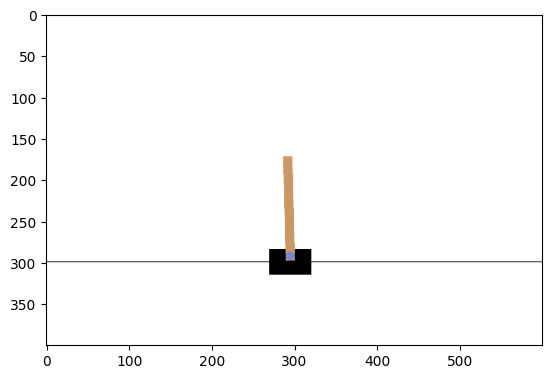

In [3]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0", render_mode="rgb_array").env # так создается симулятов окружения

env.reset() # сбрасываем параметры симулятора (устанавливаем прошедшее всемя с начала эпизода на 0, накопленную награду на 0, сбрасываются параметры инерции)
n_actions = env.action_space.n # получаем количество возможных действий управления
state_dim = env.observation_space.shape[0] # получаем размерность вектора наблюдений
print('Выход функции step:', env.step(0)) #для того чтобы сделать шаг симуляции есть функция step, принимающая на вход действие и возвращающая следующее состояние, награду, индикатор окончания эпизода и дополнительную иннформацию
plt.imshow(env.render()) #render отрисовывает окружающую среду в формате пригодном для подачи в функцию imshow
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close() # останавливаем симуляцию

In [4]:
import os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

from IPython.display import clear_output
%config InlineBackend.figure_formats = ['svg']

Напомним суть метода A2C:

Есть 2 нейронный сети: Actor и Critic. Critic - по-сути функция Беллмана, которую обучают под дискретное уравнение Беллмана.

Actor - политика, которую мы обучаем максимизировать функцию Беллмана.



In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Создайте 2 вышеупомянутые нейросети. Для нашей задачи хватит 2-3 линейных слоя в каждой. Так как пространство действий дискретно, вам  надо будет пробросить градиент через семплирование с вероятностями. В этом вам поможет torch.distributions.Categorical как возвращаемое значение Actor

In [6]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        
        self.layers = torch.nn.ModuleList([
            torch.nn.Linear(state_size, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),

            torch.nn.Linear(32, action_size)
        ])

        # self._reset_weights()

    def forward(self, state):
        for module in self.layers:
            state = module(state)
        m = torch.distributions.categorical.Categorical(logits=state)
        move = m.sample()
        return move, state[move], m.entropy()
    
    def _reset_weights(self):
        for layer in self.layers:
            if isinstance(layer, torch.nn.Linear):
                torch.nn.init.kaiming_normal_(layer.weight)

class Critic(nn.Module):
    def __init__(self, state_size, action_size):
        super(Critic, self).__init__()
        
        self.layers = torch.nn.ModuleList([
            torch.nn.Linear(state_size, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),

            torch.nn.Linear(32, action_size)
        ])

        # self._reset_weights()

    def forward(self, state):
        for module in self.layers:
            state = module(state)
        return state
    
    def _reset_weights(self):
        for layer in self.layers:
            if isinstance(layer, torch.nn.Linear):
                torch.nn.init.kaiming_normal_(layer.weight)

Теперь для удобства реализуем функцию compute_returns, вычисляющую значения Q - функции. На вход она получает список rewards наград, получаемых на каждом шаге куска траектории, next_state - выход критика в последнем состоянии таектории. При обучении мы будем последовательно генерировать кусок траектории фиксированной длины (из соображений удобства). На выходе вы должны получить оценку Q-функции. Нам никто не гарантирует что эпизод не закончится раньше чем закончится генерция траектории. Например, N = 20, а на 10 эпизоде у нас маятник уже упал. gymnasium в таком случае автоматически запускает новый эпизод и при следующем вызове step эпизод будет уже новый. Для этого, в функцию передается параметр dones, являющийся списком длины N, содержащий индикаторы того, завершился ли эпизод на соответствующем шаге. Соответственно, для оценок Q-функции на куске уже траектории, известной до последнего эпизода, прибавлять V-функцию не нужно, так как мы и так знаем все награды до самого конца.

Теперь реализуйте итерацию обучения. Напомним формулы:


$L_{actor} = -\frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N log(π(a_t^m|s_t^m))A(a_t^m, s_t^m)$

$L_{critic} = \frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N (V(s_t^m) - y(s_t^m, a_t^m))$

$y(s_t^m, a_t^m) = \sum_{t'=t}^{N-1} γ^{t'-t} r(s_{t'}, a_{t'}) + γ^{N-t} V(s_N) $

In [7]:
def Q_function(last_belman, rewards, dones, gamma=0.99):
    q_funcs = []

    # sum over each reward in each position
    for t0 in range(len(rewards)):
        summer = 0
        for t in range(t0, len(rewards)):
            summer += rewards[t] * (gamma ** (t - t0))
            if dones[t]:
                break
        q_funcs.append(summer)
    
    # add belman value to unterminated session
    if not dones[-1]:
        for t in reversed(range(len(rewards))):
            q_funcs[t] += last_belman * (gamma ** (len(rewards) - t))
            if dones[t]:
                break

    return torch.stack(q_funcs, dim=0)

In [8]:
def t(obs, device):
    return torch.from_numpy(obs).type(torch.float32).to(device)

In [14]:
def trainEnv(env, actor, critic, optim_actor, optim_critic, device, target_track_len, show_scores=True):
    actor.train()
    critic.train()

    top_track_line = []
    med_score = []
    max_score = []
    min_score = []

    carr_track_len = 20
    success_on_track = 0
    for iter in count():
        if carr_track_len >= target_track_len:
            print('out!')
            break

        track_scores = []

        # reset stats of run
        rewards = []
        belman_vals = []
        action_lps = []
        dones = []
        entropy_moves = 0.0

        # clear learning params of models
        optim_actor.zero_grad()
        optim_critic.zero_grad()

        score = 0
        observation = env.reset()[0]
        for i in range(carr_track_len):
            # get observation from environment
            observation = t(observation, device)

            # get actor and critic actions
            move, action_logit, entropy = actor(observation)
            belman_pred = critic(observation).squeeze()

            # make step in simulation
            observation, reward, done, *_ = env.step(move.item())

            # add stats
            rewards.append(torch.tensor(reward).type(torch.float32).to(device))
            belman_vals.append(belman_pred)
            action_lps.append(action_logit)
            dones.append(done)
            entropy_moves += entropy

            # in case of done session print current time of living
            score += 1
            if done:
                if show_scores:
                    print('Iteration: {}, Score: {}'.format(iter, score))
                observation = env.reset()[0]
                track_scores.append(score)
                score = 0
        track_scores.append(score)

        # obtain last belman prediction
        observation = t(observation, device)
        last_belman_pred = critic(observation).squeeze()

        # get q_function outcome for each position and stack log_probs, belman_predictions
        q_funcs = Q_function(last_belman_pred, rewards, dones).detach()
        log_probs = torch.stack(action_lps, dim=0)
        v_funcs = torch.stack(belman_vals, dim=0)
        
        # get losses with fixated previous politics
        advantages  = q_funcs - v_funcs
        loss_actor  = -torch.sum(log_probs * advantages.detach())
        loss_critic = advantages.T @ advantages / len(advantages)

        # make optimisation steps
        loss = loss_actor + loss_critic - entropy_moves * 0.05
        loss.backward()
        optim_actor.step()
        optim_critic.step()

        if score >= carr_track_len - 5:
            success_on_track += 1
        else:
            success_on_track -= 0.8
            success_on_track = np.maximum(success_on_track, 0)
        
        if success_on_track >= 20:
            success_on_track = 0
            carr_track_len += 20

        top_track_line.append(carr_track_len)
        med_score.append(np.median(np.array(track_scores)))
        max_score.append(np.max(np.array(track_scores)))
        min_score.append(np.min(np.array(track_scores)))

        clear_output(wait=True)
        plt.figure(figsize=(12,6))
        plt.plot(np.arange(len(med_score)), med_score, label='median on runs')
        plt.fill_between(np.arange(len(med_score)), max_score, min_score, facecolor='lightblue', alpha=0.5, label='min&max')
        plt.plot(np.arange(len(top_track_line)), top_track_line, c='#ff7f0e', label='track len on iter')
        plt.title(f'Длина трэка {carr_track_len}, счетчик успеха {success_on_track:.2f}')
        plt.xlabel('итерация')
        plt.ylabel('длина траектории')
        plt.grid()
        plt.legend()
        plt.show()
    
    torch.save(actor, 'actor_lader.pkl')
    torch.save(critic, 'critic_lader.pkl')
    env.close()

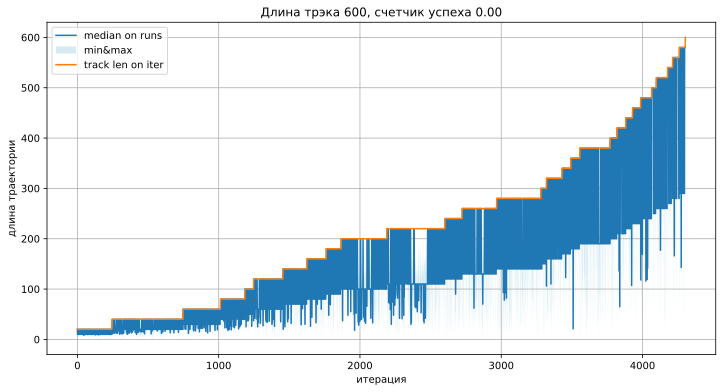

out!


In [15]:
actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, 1).to(device)

optimizerActor  = torch.optim.Adam(actor.parameters(), lr=0.001)
optimizerCritic = torch.optim.Adam(critic.parameters(), lr=0.001)

trainEnv(env, actor, critic, optimizerActor, optimizerCritic, device, target_track_len=600, show_scores=False)

Проверьте обученные сети. Награда после завершения эпизода должна быть стабильно больше 300. Можно менять количество эпох обучения

In [17]:
# для тестирования скопируйте цикл for из предыдущей ячейки сюда, удалите логгирования, замените range(N) 
# на count() (тогда он будет бесконечно итерироваться) и в if done запихните break.
state = env.reset()[0]

for i in count():
    env.render()
    # получите действие и значение V - функции в текущем состоянии state
    move, *_ = actor(torch.tensor(state).to(device).view(1, -1))
    v_cost = critic(torch.tensor(state).to(device).view(1, -1))
    #  шаг симулятора
    state, reward, done, *_ = env.step(move.item())

    if done:
        print('Iteration: {}, Score: {}'.format(iter, i))
        state = env.reset()[0]
        break

Iteration: <built-in function iter>, Score: 5542


In [23]:
end_runs = []

for _ in range(27):
    state = env.reset()[0]

    for i in count():
        env.render()
        # получите действие и значение V - функции в текущем состоянии state
        move, *_ = actor(torch.tensor(state).to(device).view(1, -1))
        v_cost = critic(torch.tensor(state).to(device).view(1, -1))
        #  шаг симулятора
        state, reward, done, *_ = env.step(move.item())
    
        if done:
            end_runs.append(i)
            break

print(f'Mean: {np.array(end_runs).mean():.3f}, Std: {np.array(end_runs).std():.3f}')

Mean: 4933.020, Std: 390.051


Реализуем функцию для записи траекторий.

In [21]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    observation = env.reset()[0]

    for t in range(t_max):
        observation = torch.from_numpy(observation).type(torch.float32).to(device)
        a, *_ = agent(observation)

        
        observation, r, terminated, truncated, _ = env.step(a.item())

        # накапливаем траекторию
        states.append(observation)
        actions.append(a.item())
        total_reward += r

        if terminated or truncated:
            break
    return states, actions, total_reward

Запишем видео работы сетей (парочку видео приложите в  энитаск)

In [22]:
from gymnasium.wrappers import RecordVideo
from moviepy.config import change_settings
# change_settings({"FFMPEG_BINARY": "/usr/bin/ffmpeg"})

with RecordVideo(
    env=gym.make("CartPole-v0", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, actor) for _ in range(100)]

/Users/artemon/.local/share/virtualenvs/OptimalControl-RL-fNuaDLvP/lib/python3.11/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-0.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-1.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-2.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-3.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-3.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-4.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-4.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-5.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-5.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-6.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-6.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-7.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-7.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-8.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-9.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-9.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-10.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-10.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-11.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-11.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-12.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-12.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-13.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-13.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-14.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-14.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-15.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-15.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-16.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-16.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-17.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-17.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-18.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-18.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-19.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-19.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-20.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-20.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-21.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-21.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-22.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-22.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-23.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-23.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-24.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-24.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-25.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-25.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-26.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-26.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-27.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-27.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-28.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-28.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-29.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-29.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-30.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-30.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-31.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-31.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-32.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-32.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-33.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-33.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-34.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-34.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-35.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-35.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-36.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-36.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-37.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-37.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-38.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-38.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-39.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-39.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-40.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-40.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-41.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-41.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-42.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-42.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-43.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-43.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-44.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-44.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-45.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-45.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-46.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-46.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-47.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-47.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-48.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-48.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-49.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-49.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-50.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-50.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-51.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-51.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-52.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-52.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-53.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-53.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-54.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-54.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-55.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-55.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-56.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-56.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-57.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-57.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-58.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-58.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-59.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-59.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-60.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-60.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-61.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-61.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-62.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-62.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-63.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-63.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-64.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-64.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-65.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-65.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-66.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-66.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-67.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-67.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-68.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-68.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-69.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-69.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-70.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-70.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-71.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-71.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-72.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-72.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-73.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-73.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-74.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-74.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-75.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-75.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-76.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-76.mp4


Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-77.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-77.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-78.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-78.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-79.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-79.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-80.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-80.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-81.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-81.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-82.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-82.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-83.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-83.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-84.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-84.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-85.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-85.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-86.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-86.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-87.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-87.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-88.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-88.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-89.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-89.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-90.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-90.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-91.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-91.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-92.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-92.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-93.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-93.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-94.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-94.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-95.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-95.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-96.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-96.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-97.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-97.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-98.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-98.mp4
Moviepy - Building video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-99.mp4.
Moviepy - Writing video /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready /Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/MMRO-neoclassic/homework/OptimalControl-RL/videos/rl-video-episode-99.mp4
